# twitter 형태소 분석기 설치

In [1]:
pip install customized_konlpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
import numpy as np

from konlpy.tag import Twitter
from ckonlpy.tag import Twitter
twitter=Twitter()
twitter.add_dictionary('낡은규제', 'Noun')
twitter.add_dictionary('상속세율', 'Noun')
twitter.add_dictionary('확대', 'Noun')
twitter.add_dictionary('기회', 'Noun')
twitter.add_dictionary('신재생', 'Noun')
twitter.add_dictionary('저평가', 'Noun')
twitter.add_dictionary('고평가', 'Noun')
twitter.add_dictionary('슈퍼리치', 'Noun')
twitter.add_dictionary('엔씨소프트', 'Noun')
twitter.add_dictionary('메리츠', 'Noun')
twitter.add_dictionary('세컨드', 'Noun')
twitter.add_dictionary('업무', 'Noun')
twitter.add_dictionary('관리', 'Noun')
twitter.add_dictionary('메세지', 'Noun')
twitter.add_dictionary('최고', 'Noun')
twitter.add_dictionary('산업', 'Noun')
twitter.add_dictionary('주목', 'Noun')
twitter.add_dictionary('넘어선', 'Noun')
twitter.add_dictionary('인큐베이팅', 'Noun')
twitter.add_dictionary('벤처', 'Noun')
import nltk


from wordcloud import WordCloud, STOPWORDS

C:\Users\keonj\AppData\Roaming\Python\Python38\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


# 데이터 불러오기

In [3]:
import pandas as pd

data=pd.read_csv('df_fin.csv')

In [4]:
data

,Date,기사제목,Close,Change,등락구분,label,주가 반영 Date
0,2021-01-01,"[낡은규제혁파①]""세계 최고 상속세율, 기업인에 사망선고""…재계, 상속세율 ...",83000.0,0.024691,True,1.0,2021-01-04
1,2021-01-01,[낡은규제혁파①]암세포 같은 낡은 규제가 한국 경제 혁신 막는다,83000.0,0.024691,True,1.0,2021-01-04
2,2021-01-01,머리카락 100배 얇은 초박막렌즈 개발…스마트폰 `카툭튀` 없앤다,83000.0,0.024691,True,1.0,2021-01-04
3,2021-01-01,"1월효과, 연말랠리 잇는다…증권가 ""실적개선·경기민감株 주목""",83000.0,0.024691,True,1.0,2021-01-04
4,2021-01-01,"[낡은규제혁파①]""세계 최고 상속세율, 기업인에 사망선고""…재계, 상속세율 ...",83000.0,0.024691,True,1.0,2021-01-04
...,...,...,...,...,...,...,...
5479,2021-06-29,"삼성전자 ""美공장부지 선정 못했다""…핵심은 '칩스법'",80700.0,-0.003704,False,-1.0,2021-06-30
5480,2021-06-29,삼성 'SSAFY'·SK '하이파이브'…정부 지원으로 3천명+α 확대,80700.0,-0.003704,False,-1.0,2021-06-30
5481,2021-06-29,"삼성전자, 2Q 영업익 11조원 초반대…반도체 견인-IBK",80700.0,-0.003704,False,-1.0,2021-06-30
5482,2021-06-29,"삼성·LG전자, 2분기 실적도 '훨훨'…내주 잠정실적 발표",80700.0,-0.003704,False,-1.0,2021-06-30


# 한글 데이터 불러오기

In [5]:
list_result=[]
for i in range(len(data['Date'])):
    text=data.iloc[i]['기사제목']
    text=re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]','',text)
    text = re.sub(r'\d+','',text)# remove number
    text = text.lower() #lower case
    text = re.sub(r'\s+', ' ', text) #remove extra space
    text = re.sub(r'<[^>]+>','',text) #remove Html tags
    text = re.sub(r'\s+', ' ', text) #remove spaces
    text = re.sub(r"^\s+", '', text) #remove space from start
    text = re.sub(r'\s+$', '', text)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result=hangul.sub('',text)
    twit_result=twitter.morphs(result)
    list_result.append(twit_result)
        
    
data['형태소분석_1']=list_result

In [6]:
data

,Date,기사제목,Close,Change,등락구분,label,주가 반영 Date,형태소분석_1
0,2021-01-01,"[낡은규제혁파①]""세계 최고 상속세율, 기업인에 사망선고""…재계, 상속세율 ...",83000.0,0.024691,True,1.0,2021-01-04,"[낡은규제, 혁파, 세계, 최고, 상속세율, 기업인, 에, 사망, 선고, 재계, 상..."
1,2021-01-01,[낡은규제혁파①]암세포 같은 낡은 규제가 한국 경제 혁신 막는다,83000.0,0.024691,True,1.0,2021-01-04,"[낡은규제, 혁파, 암세포, 같은, 낡은, 규제, 가, 한국, 경제, 혁신, 막는다]"
2,2021-01-01,머리카락 100배 얇은 초박막렌즈 개발…스마트폰 `카툭튀` 없앤다,83000.0,0.024691,True,1.0,2021-01-04,"[머리카락, 배, 얇은, 초, 박막, 렌즈, 개발, 스마트폰, 카툭, 튀, 없앤다]"
3,2021-01-01,"1월효과, 연말랠리 잇는다…증권가 ""실적개선·경기민감株 주목""",83000.0,0.024691,True,1.0,2021-01-04,"[월, 효과, 연말, 랠리, 잇는다, 증권, 가, 실적, 개선, 경기, 민감, 주목]"
4,2021-01-01,"[낡은규제혁파①]""세계 최고 상속세율, 기업인에 사망선고""…재계, 상속세율 ...",83000.0,0.024691,True,1.0,2021-01-04,"[낡은규제, 혁파, 세계, 최고, 상속세율, 기업인, 에, 사망, 선고, 재계, 상..."
...,...,...,...,...,...,...,...,...
5479,2021-06-29,"삼성전자 ""美공장부지 선정 못했다""…핵심은 '칩스법'",80700.0,-0.003704,False,-1.0,2021-06-30,"[삼성, 전자, 공장, 부지, 선정, 못, 했다, 핵심, 은, 칩스, 법]"
5480,2021-06-29,삼성 'SSAFY'·SK '하이파이브'…정부 지원으로 3천명+α 확대,80700.0,-0.003704,False,-1.0,2021-06-30,"[삼성, 하이파이브, 정부, 지원, 으로, 천명, 확대]"
5481,2021-06-29,"삼성전자, 2Q 영업익 11조원 초반대…반도체 견인-IBK",80700.0,-0.003704,False,-1.0,2021-06-30,"[삼성, 전자, 영업, 익, 조원, 초, 반대, 반도체, 견인]"
5482,2021-06-29,"삼성·LG전자, 2분기 실적도 '훨훨'…내주 잠정실적 발표",80700.0,-0.003704,False,-1.0,2021-06-30,"[삼성, 전자, 분기, 실적, 도, 훨훨, 내주, 잠정, 실적, 발표]"


# 새로운 문장 만들기

In [7]:
news_title=data['형태소분석_1']
news_list=[]
for i in range(len(news_title)):
    list1=[]
    for j in range(len(news_title[i])):
        list1.append(news_title[i][j])
    news_list.append(' '.join(list1))
news_list

['낡은규제 혁파 세계 최고 상속세율 기업인 에 사망 선고 재계 상속세율',
 '낡은규제 혁파 암세포 같은 낡은 규제 가 한국 경제 혁신 막는다',
 '머리카락 배 얇은 초 박막 렌즈 개발 스마트폰 카툭 튀 없앤다',
 '월 효과 연말 랠리 잇는다 증권 가 실적 개선 경기 민감 주목',
 '낡은규제 혁파 세계 최고 상속세율 기업인 에 사망 선고 재계 상속세율',
 '갤럭시 이번 엔 티저 영상 유출 새 로운 갤럭시 가 기 다리 고 있다',
 '밑줄 쫙 국정 농단 대미 장식 특검 이재용 에 징역 년 구형',
 '코스피 시 총 사상 최초 넘어선 듯 삼전 조원 증가',
 '경제 기상도 코로나 에 갇혔던 경제 소의 뿔 처럼 저돌 적 돌파 기대',
 '반도체 메모리 값 강세 지속 파운드리 수요 도 늘듯',
 '디스플레이 더 선명 해 진 프리미엄 시장 선점',
 '가전 집콕 수혜 백색 가전 상반기 까지 돌풍 예고',
 '스마트폰 중 저가 폰 라인업 확 대두 자릿수 성장 노려',
 '애플 폰 출시 두 달새 삼성 판매량 추월',
 '주식 부호 조 클럽 명 김범수 카카오 의장 순위 껑충',
 '장기 자의 비 사이드 크리스마스 는 아이폰 이 접수',
 '애플 카 전자 의 야심작 롤러 블 이 달 첫 선어 떻 게 생겼나',
 '슈퍼리치 재테크 스타 가 조언 하는 올해 주목 할 테마',
 '품질 로 경쟁 선언 반년 만에 명칭 놓고 삼성 신경 전',
 '대 그룹 시무 식 일 온라인 개최 이재용 신년사 없을 듯',
 '장기 자의 비 사이드 크리스마스 는 아이폰 이 접수',
 '주목 스몰 캡 살아나는 반도체 업 황기 회 찾아온 아이 원스',
 '유안 타 주간 추천 주 매출 반등 예상 삼성 전자 아모레퍼시픽 엔 씨 소프',
 '단독 주린이 삼성로 몰리나 현대차 배터리 공급 후보 낙점',
 '삼성 전자 여전 히 저평가 전문가 새해 톱픽 추천',
 '삼성 패스 로 연말정산 을 전자서명 시장 본격 진출',
 '국내 가입자 천만 명 돌파 올해 대중화 단계',
 '펀드 와 치 사상 최고 치 코스피 레

In [8]:
new_data=np.array(news_list)

In [9]:
new_data

array(['낡은규제 혁파 세계 최고 상속세율 기업인 에 사망 선고 재계 상속세율',
       '낡은규제 혁파 암세포 같은 낡은 규제 가 한국 경제 혁신 막는다',
       '머리카락 배 얇은 초 박막 렌즈 개발 스마트폰 카툭 튀 없앤다', ...,
       '삼성 전자 영업 익 조원 초 반대 반도체 견인', '삼성 전자 분기 실적 도 훨훨 내주 잠정 실적 발표',
       '삼성 전자 사내 외 벤처 인큐베이팅 가 동년 동안 개 프로젝트 육성'], dtype='<U48')

# 불용어 추가 및 토큰화

In [10]:
stopwords='아 휴 아이구 도 선 은 조 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓'

stopwords=stopwords.split(' ')

In [11]:
for i, each_word in enumerate(new_data):
    clean_words=[]
    for word in nltk.tokenize.word_tokenize(each_word):
        if word not in stopwords:
            clean_words.append(word)
    print(clean_words)
    new_data[i]=' '.join(clean_words)

['낡은규제', '혁파', '세계', '최고', '상속세율', '기업인', '사망', '선고', '재계', '상속세율']
['낡은규제', '혁파', '암세포', '낡은', '규제', '한국', '경제', '혁신', '막는다']
['머리카락', '배', '얇은', '초', '박막', '렌즈', '개발', '스마트폰', '카툭', '튀', '없앤다']
['효과', '연말', '랠리', '잇는다', '증권', '실적', '개선', '경기', '민감', '주목']
['낡은규제', '혁파', '세계', '최고', '상속세율', '기업인', '사망', '선고', '재계', '상속세율']
['갤럭시', '엔', '티저', '영상', '유출', '새', '로운', '갤럭시', '기', '다리', '고']
['밑줄', '쫙', '국정', '농단', '대미', '장식', '특검', '이재용', '징역', '구형']
['코스피', '시', '총', '사상', '최초', '넘어선', '듯', '삼전', '조원', '증가']
['경제', '기상도', '코로나', '갇혔던', '경제', '소의', '뿔', '처럼', '저돌', '돌파', '기대']
['반도체', '메모리', '값', '강세', '지속', '파운드리', '수요', '늘듯']
['디스플레이', '선명', '해', '진', '프리미엄', '시장', '선점']
['가전', '집콕', '수혜', '백색', '가전', '상반기', '돌풍', '예고']
['스마트폰', '저가', '폰', '라인업', '확', '대두', '자릿수', '성장', '노려']
['애플', '폰', '출시', '달새', '삼성', '판매량', '추월']
['주식', '부호', '클럽', '김범수', '카카오', '의장', '순위', '껑충']
['장기', '자의', '비', '사이드', '크리스마스', '는', '아이폰', '접수']
['애플', '카', '야심작', '롤러', '블', '달', '첫', '선어', '떻', '게', '생겼나']
['슈퍼리

['이재용', '법정구속', '민주당', '통렬', '반성', '정의당', '참회', '부족함', '없어야']
['전경련', '이재용', '실형', '매우', '안타', '깝', '다', '경제', '악', '영향', '우려']
['선고', '앞둔', '이재용', '부회장', '묵묵', '부답', '법정', '향', '해']
['이재용', '오늘', '운명', '날', '실형', '집행유예', '갈림길']
['뉴스', '새벽', '배송', '대통령', '신년', '기자회견', '공매도', '언급', '할까']
['바른', '이재용', '부회장', '유죄', '판결', '법치', '주의', '무너졌다']
['국민의당', '이재용', '구속', '판결', '법원', '판단', '양형', '존중']
['경제', '어려운데', '중소', '중견', '기업', '계', '이재용', '구속', '우려']
['경', '총', '삼성', '경영', '공백', '경제', '산업', '악', '영향', '불가피']
['큰', '바보', '이론', '떠오르게', '증시', '인플레', '주목']
['이재용', '법정구속', '새', '로운', '시작', '환골탈태', '주문']
['퇴근길', '뉴스', '이재용', '징역', '실형', '법정구속']
['기관', '외국인', '처럼', '공매도', '수수료', '담보', '율', '개미', '에게도', '비슷하게']
['포토', '국정', '농단', '사건', '파기', '환송', '심', '선고', '공판', '향', '이재용', '부회장']
['박영수', '특검', '이재용', '실형', '대법', '판결', '취지', '감안', '선고']
['건설', '올해', '만여', '가구', '공급', '예정']
['포토', '법정', '향', '이재용', '부회장']
['박영수', '특검', '이재용', '실형', '대법', '판결', '취지', '감안', '선고']
['건설', '올해', '만여', '가구', '공급', '예정']

['역대', '최대', '연구개발', '비', '투입', '삼성', '차', '세대', '배터리', '승부']
['도주', '주목', '하라', '주린', '이를', '위', '염블리', '염승', '환의', '조언']
['공매도', '재연', '장', '발표', '날', '외국인', '기관', '조천', '억', '던졌다']
['반도체', '품귀', '현상', '장비', '몸값', '껑충', '중고', '장비', '쑥']
['장', '마감', '주요', '종목', '뉴스']
['삼성', '노조', '와해', '전현', '직', '임원', '유죄', '확정', '이상훈', '사장', '무죄']
['삼성', '노조', '와해', '이상훈', '의장', '무죄']
['삼성', '지원', '김형범', '교수', '논문', '셀', '실렸다']
['연세대', '김형범', '교수', '팀', '생명', '현상', '발생', '측정', '시스템', '개발']
['공매도', '재개', '달', '반', '연기', '종목', '주목', '하라']
['기고', '경제학', '에서는', '주식시장', '보고', '있을까']
['와이', '케이', '삼성', '억원', '규모', '반도체', '검사', '장비', '공급']
['삼성', '비', '스포크', '오브', '컬렉션', '디자인', '라인업', '확장', '섰다']
['대법', '삼성', '노조', '해', '이상훈', '무죄', '확정', '압수수색', '위법']
['김형범', '연세대', '교수', '팀', '질병', '노화', '발생', '측정', '시스템', '최초', '개발']
['생명', '현상', '발생', '측정', '시스템', '첫', '개발', '삼성', '지원', '했다']
['펫팸족', '잡', '아라가', '전업', '계', '부는', '반려동물', '바람']
['코스피', '마감', '외인', '기관', '매도', '대', '하락', '털썩']
['코스피', '하락', '외국인', '기관', '

['코스피', '붕괴', '하이닉스', '네이버', '삼바', '급락']
['매경', '신문', '오늘', '프리미엄']
['산업', '재편', '가속', '화', '이동근', '한국', '경영', '자총', '협회', '부회장', '국']
['학습', '기기', '트렌드', '상품', '줌', '새', '학기', '선물', '고민', '이라']
['삼성', '한파', '피해', '텍사스', '만달', '러', '기부']
['삼성', '하이닉스', '목표', '상향', '반도체', '부품', '볕드']
['국민연금', '삼성', '분']
['작년', '분기', '램', '시장', '성장', '삼성', '하이닉스', '점유', '율']
['삼성', '폰', '지난해', '점유', '율', '만에', '위', '는', '지켜']
['엘오티베큠', '삼성', '억원', '반도체', '공정', '용', '건', '식', '진공', '펌프', '공급', '계약']
['가격', '승부', '통', '했다', '갤럭시', '전성기', '수준', '회복']
['코스피', '가까이', '떨어지며', '낙폭', '확대']
['코스피', '넘게', '하락', '출발', '회']
['케이엠', '더블유', '악재', '충분', '히', '반영', '반등', '전망']
['반도체', '공급', '부족', '올해', '내내', '간다', '완성', '차', '업계', '줄줄이', '감산']
['인터뷰', '시장', '조성자', '공매도', '규제', '는', '코미디', '정치권', '빠져라']
['아버님', '댁', '에어', '프라이어', '놔', '드려야겠', '어요']
['엔', '코퍼레이션', '수처리', '기업', '한성', '크린텍', '인수']
['하이닉스', '램', '낸드', '가격', '반등', '전망', '목표', '신한']
['대한', '상의', '반도체', '현안', '민관', '소통시', '작전', '략', '지원', '규제', '완화', '절실']
['산업

['삼성', '연봉', '파격', '인상', '사원', '대리', '올려']
['머니', '매니저', '종목']
['단독', '한국', '기업', '매그나칩', '중국', '반도체', '핵심', '기술', '유출', '우려']
['갓', '성비', '저가', '폰', '유혹', '갤', '갤', '홍', '미노트', '선택']
['추월', '차선', '타기', '위', '주식', '지침', '서']
['부동산', '단신', '동탄', '호수', '공원', '길목', '수익', '형', '신축', '병원', '상가']
['이재용', '프로포폴', '투약', '혐', '의수', '사심', '위', '수사', '중단']
['검찰', '수사', '심의', '위', '이재용', '프로포폴', '의혹', '수사', '중단', '권고', '종합']
['속보', '검수', '사심', '위', '이재용', '프로포폴', '수사', '중단', '해']
['싼', '요금', '데이터', '요금', '제도', '실속', '파', '쟁탈전']
['사설', '글로벌', '반도체', '전쟁', '정부', '기업', '협력', '해', '반도체', '강국', '지켜', '내야']
['삼성', '올해', '평균', '임금', '최근', '최고', '수준']
['코스피', '외국인', '매수', '유입', '상승', '회복']
['연기금', '물폭탄', '맞은', '곳', '곳', '시장', '수익률', '밑', '돌아']
['대교', '세', '강호', '준', '신임', '대표', '선임', '경영', '승계', '본격', '화']
['롯데', '하이마트', '라이프스타일', '숍', '메가스토어', '압구정', '오픈']
['황성', '우', '삼성', '대표', '클라우드', '물류', '보안', '역량', '모으자']
['한솔', '케미칼', '라텍스', '신사', '업', '효과', '고객', '물량', '증가', '수혜']
['코스피', '외국인', '홀로', '매수', '상승'

['산책', '면서', '쓰레기', '줍는다', '고양시', '에코', '플로', '깅', '진행']
['정용진', '그리', '는', '호텔', '신세계', '조력자', '브라이언', '백']
['외환', '마감', '환율', '하루', '만에', '강', '보합', '배당', '경계', '감', '살아나']
['글로벌', '반도체', '전쟁', '참전', '특별법', '제정', '세제', '금융', '지원', '검토']
['외환', '브리핑', '달러', '약세', '에도', '위험', '선호', '둔화', '원대', '반등', '예상']
['미', '리보', '는', '이데일리', '신문', '반도체', '공급망', '주도', '강조', '액션', '플랜', '없었다']
['대통령', '반도체', '세계', '위', '지키겠', '다대기', '업', '규제', '완화', '해달']
['머티리얼즈', '반도체', '빅', '사이클', '수혜', '성장', '성', '담보', '신한']
['확대경', '장관', '회의', '소집', '업계', '반도체', '대책', '마련', '필요']
['스마트', '건축', '인증', '제도', '개편', '예고', '스마트홈', '표준화', '기대']
['미래에셋', '증권', '종목', '신규', '상장']
['토스', '증권', '오픈', '달', '만에', '계좌', '돌파']
['토스', '증권', '오픈', '달', '만에', '계좌', '돌파']
['대통령', '반도체', '공급망', '주도', '업계', '인력', '양성', '세액', '공제', '필요']
['액', '분', '카카오', '신주', '첫날', '급등', '단숨', '시', '총', '위']
['현대', '엔지니어링', '힐스테이트', '모종', '네오', '루체', '분양']
['대통령', '글로벌', '반도체', '공급망', '계속', '주도', '해']
['한국', '문화', '전도사', '는', '부캐', '본업', '글로벌', '투자

['최태원', '대한', '상의', '회장', '취임', '첫', '국회', '방문', '나서']
['고마', '운', '마음', '전하', '세', '요가', '정의', '달', '특수', '노린', '업계']
['이원욱', '이재용', '사면', '필요성', '강력', '하게', '존재']
['김부겸', '피해', '호소', '표현', '사과', '피해자', '입장', '고려', '못', '해']
['김부겸', '공감', '대', '없는', '사면', '통합', '경제', '발전', '도움', '돼']
['청문회', '통과', '문승욱', '산업', '장관', '견고', '수출', '강국', '종합']
['밑줄', '쫙', '공매도', '재개', '첫날', '통신', '바이오', '울었다']
['이건희', '미술관', '지역', '미술', '계', '지자체', '유치', '경쟁', '치열']
['고마', '운', '마음', '전하', '세', '요가', '정의', '달', '특수', '노린', '업계']
['머티리얼즈', '올해', '호실', '지속', '전망', '목표']
['에스', '피지', '공작기계', '업체', '감속', '기', '공급', '승인']
['머티리얼즈', '전방', '산업', '성장', '지속', '목표']
['실리콘밸리', '한국인', '창업', '몰', '로코', '번째', '유니콘', '기업', '극']
['임혜숙', '후보자', '정책', '부정', '적탈', '원전', '맞는', '방향', '종합']
['유진', '투자', '증권', '리자드', '스텝', '다운', '공모']
['신정', '중국', '상장', '읽', '기비', '싸도', '팔리는', '마오타이', '주가', '는', '맥', '못', '추']
['자사', '조억', '소각', '결정', '삼성', '최대']
['코스피', '보합', '권', '출발', '외국인', '기관', '매수']
['문승욱', '산업', '장관', '후보자', '이재용', '사면'

['덕산', '네오', '룩스', '하반기', '실적', '모멘텀', '강화', '비중', '확대', '권고', '신한']
['코스피', '소', '폭', '상승', '출발', '등락', '금융', '소재', '약세']
['미', '리보', '는', '이데일리', '신문', '민간', '재개발', '확대', '정부', '공급', '책', '맞', '불']
['베이스', '인베스트먼트', '김병학', '카카오', '부사', '장', '입']
['잇는', '이재용', '사면', '요구', '별도', '고려', '광복절', '특사', '가능성']
['분기', '헙', '업계', '순', '익', '금리', '주가', '상승', '코로나', '영향']
['위기', '우뚝', '바이오', '삼성', '반도체', '백신', '허브', '성장', '판', '됐다']
['노트북', '건', '강하', '게', '삼성', '노트북', '용', '친환경', '인증', '그린', '가드', '획득']
['삼성', '채널', '최초', '구현', '사운드', '바', '신제품', '출시']
['레이더', '국민', '힘', '관심', '인물', '윤석열', '최재형', '닮은']
['비용', '든다고', '손', '놨다간', '큰', '기회', '놓칠것']
['코로나', '이후', '고용', '증가', '위', '는', '성전', '자위', '는']
['글로벌', '브랜드', '컨설팅', '전문', '기업', '서울', '한국', '법인', '개소']
['넵튠', '메타', '버스', '플랫폼', '기업', '맘모', '식스', '인수']
['대구', '광주', '상의', '이재용', '사면', '서명', '돌입']
['내달', '대', '그룹', '총수', '만난', '다', '정의선', '최태원', '구광모', '참석']
['삼성', '신발', '최적', '상태', '관리', '해주', '는', '비', '스포크', '슈', '드레서', '출시']
['삼성', '세계', '최고

['상생', '협약', '위반', '베스트', '샵', '아이폰', '판매', '돼', '동반', '위', '진정']
['생애', '두번째', '옥중', '생일', '맞은', '이재용', '광복절', '사면', '주목']
['그룹', '총수', '대표이사', '명함']
['네트웍', '스', '온라인', '서', '노트북', '재', '구매', '할인', '프로그램', '출시']
['그룹', '총수', '대표이사', '명함']
['주린이', '전쟁', '이벤트', '준', '주식', '수익률', '경험', '판다']
['생생', '확대경', '귀하', '신', '몸', '된', '팹리스']
['원자재', '가격', '급등', '에가', '전업', '계', '하반기', '프로모션', '축소', '되나']
['특징', '주비', '에이치', '강세', '폴더', '블폰', '안정', '수혜']
['특징', '주비', '에이치', '강세', '폴더', '블폰', '안정', '수혜']
['코스피', '금리', '인상', '불안', '안도', '상승', '출발']
['관계', '형', '커머스', '힘', '카카오', '톡딜', '재', '구매', '율']
['롯데', '온', '스트레스', '극복', '위', '블루', '제로', '기획전', '개최']
['위성', '망', '지상', '망', '통합', '기', '정통부', '억', '투자']
['포토', '주한', '미', '대사', '전략', '회의', '참석', '임혜숙', '장관']
['포토', '전략', '회의']
['포토', '민관', '합동', '전략', '회의']
['포토', '새', '로운', '준비', '전략', '회의']
['코스피', '마감', '역대', '최고', '치', '문턱', '상승']
['스마트폰', '접은', '아이폰', '판매', '서나', '유통', '상생', '협약', '지켜라']
['롯데', '초대형', '리', '빙전', '문관', '메종', '동부', '산', '개관']


In [12]:
print(new_data)

['낡은규제 혁파 세계 최고 상속세율 기업인 사망 선고 재계 상속세율' '낡은규제 혁파 암세포 낡은 규제 한국 경제 혁신 막는다'
 '머리카락 배 얇은 초 박막 렌즈 개발 스마트폰 카툭 튀 없앤다' ... '삼성 영업 익 조원 초 반대 반도체 견인'
 '삼성 분기 실적 훨훨 내주 잠정 실적 발표' '삼성 사내 외 벤처 인큐베이팅 동년 프로젝트 육성']


In [13]:
new_data[0]


'낡은규제 혁파 세계 최고 상속세율 기업인 사망 선고 재계 상속세율'

In [14]:
corpus = "".join(new_data.tolist())

In [15]:
corpus

'낡은규제 혁파 세계 최고 상속세율 기업인 사망 선고 재계 상속세율낡은규제 혁파 암세포 낡은 규제 한국 경제 혁신 막는다머리카락 배 얇은 초 박막 렌즈 개발 스마트폰 카툭 튀 없앤다효과 연말 랠리 잇는다 증권 실적 개선 경기 민감 주목낡은규제 혁파 세계 최고 상속세율 기업인 사망 선고 재계 상속세율갤럭시 엔 티저 영상 유출 새 로운 갤럭시 기 다리 고밑줄 쫙 국정 농단 대미 장식 특검 이재용 징역 구형코스피 시 총 사상 최초 넘어선 듯 삼전 조원 증가경제 기상도 코로나 갇혔던 경제 소의 뿔 처럼 저돌 돌파 기대반도체 메모리 값 강세 지속 파운드리 수요 늘듯디스플레이 선명 해 진 프리미엄 시장 선점가전 집콕 수혜 백색 가전 상반기 돌풍 예고스마트폰 저가 폰 라인업 확 대두 자릿수 성장 노려애플 폰 출시 달새 삼성 판매량 추월주식 부호 클럽 김범수 카카오 의장 순위 껑충장기 자의 비 사이드 크리스마스 는 아이폰 접수애플 카 야심작 롤러 블 달 첫 선어 떻 게 생겼나슈퍼리치 재테크 스타 조언 올해 주목 테마품질 경쟁 선언 반년 만에 명칭 놓고 삼성 신경대 그룹 시무 식 온라인 개최 이재용 신년사 없을 듯장기 자의 비 사이드 크리스마스 는 아이폰 접수주목 스몰 캡 살아나는 반도체 업 황기 회 찾아온 원스유안 타 주간 추천 매출 반등 예상 삼성 아모레퍼시픽 엔 소프단독 주린이 삼성로 몰리나 현대차 배터리 공급 후보 낙점삼성 여전 히 저평가 전문가 새해 톱픽 추천삼성 패스 연말정산 전자서명 시장 본격 진출국내 가입자 천만 돌파 올해 대중화 단계펀드 치 사상 최고 치 코스피 레버리지 펀드 껑충국내 가입자 천만 돌파 제재 새해 폰 애플 위주간 증시 전망 어닝 시즌 진입 효과 시동 걸까이재용 부회장 경영 전념 하게 해달 국민 청원 등장스페셜 리포트 삼성 포스코 시가총액 증가 기업 사장 승진 많았다코스피 주간 외국인 순 매도 위 삼성코스피 주간 개인 순 매수 위 삼성주간 추천 업황 개선 기대 러브콜 삼성삼성 분기 잠정 실적 발표 임박 코로나 수혜 이어 지나지난해 폰 위 는 화웨

# 명사 추출하기

In [16]:
nouns = twitter.nouns(corpus)

In [17]:
nouns

['낡은규제',
 '혁파',
 '세계',
 '최고',
 '상속세율',
 '기업인',
 '사망',
 '선고',
 '재계',
 '상속세율',
 '낡은규제',
 '혁파',
 '암세포',
 '규제',
 '한국',
 '경제',
 '혁신',
 '머리카락',
 '배',
 '초',
 '박막',
 '렌즈',
 '개발',
 '스마트폰',
 '카툭',
 '효과',
 '연말',
 '랠리',
 '증권',
 '실적',
 '개선',
 '경기',
 '민감',
 '주목',
 '낡은규제',
 '혁파',
 '세계',
 '최고',
 '상속세율',
 '기업인',
 '사망',
 '선고',
 '재계',
 '상속세율',
 '갤럭시',
 '티저',
 '영상',
 '유출',
 '새',
 '갤럭시',
 '기',
 '다리',
 '고',
 '밑줄',
 '쫙',
 '국정',
 '농단',
 '대미',
 '장식',
 '특검',
 '이재용',
 '징역',
 '구형',
 '코스피',
 '시',
 '총',
 '사상',
 '최초',
 '넘어선',
 '듯',
 '삼전',
 '조원',
 '증',
 '가경제',
 '기상도',
 '코로나',
 '경제',
 '소의',
 '뿔',
 '처럼',
 '저돌',
 '돌파',
 '기대',
 '반도체',
 '메모리',
 '값',
 '강세',
 '지속',
 '파운드리',
 '수요',
 '디스플레이',
 '선명',
 '해',
 '진',
 '프리미엄',
 '시장',
 '선점',
 '가전',
 '집콕',
 '수혜',
 '백색',
 '가전',
 '상반기',
 '돌풍',
 '예고',
 '스마트폰',
 '저가',
 '폰',
 '라인업',
 '확',
 '대두',
 '자릿수',
 '성장',
 '애플',
 '폰',
 '출시',
 '달새',
 '삼성',
 '판매량',
 '추월',
 '주식',
 '부호',
 '클럽',
 '김범수',
 '카카오',
 '의장',
 '순위',
 '껑충',
 '장기',
 '자의',
 '비',
 '사이드',
 '크리스마스',
 '아이폰',
 '접수',
 '애플',
 '카',
 '야심작',
 

# 많이 나온 단어 확인하기

In [18]:
from collections import Counter
counter = Counter(nouns)
counter.most_common(10)

[('삼성', 2015),
 ('반도체', 581),
 ('코스피', 517),
 ('이재용', 376),
 ('투자', 268),
 ('위', 253),
 ('기업', 208),
 ('갤럭시', 204),
 ('실적', 174),
 ('상승', 173)]

In [19]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('삼성', 2015),
 ('반도체', 581),
 ('코스피', 517),
 ('이재용', 376),
 ('투자', 268),
 ('기업', 208),
 ('갤럭시', 204),
 ('실적', 174),
 ('상승', 173),
 ('마감', 173)]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
bow_vect=vect.fit_transform(new_data.tolist())
word_list=vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [21]:
word_list

['가격',
 '가경',
 '가고',
 '가구',
 '가까워서',
 '가까워졌네',
 '가까워졌다',
 '가까이',
 '가나',
 '가는',
 '가능',
 '가능성',
 '가니',
 '가닥',
 '가덕도',
 '가던트',
 '가동',
 '가드',
 '가드닝',
 '가득',
 '가뜩이나',
 '가라',
 '가려라',
 '가려진',
 '가로',
 '가르',
 '가르는',
 '가를',
 '가면',
 '가뭄',
 '가방',
 '가벼워져도',
 '가볍',
 '가볍게',
 '가보',
 '가볼까',
 '가비',
 '가상',
 '가상현실',
 '가상화',
 '가석방',
 '가선',
 '가성',
 '가세',
 '가속',
 '가수',
 '가스',
 '가스전',
 '가슴',
 '가시',
 '가야',
 '가업승계',
 '가열',
 '가온',
 '가요',
 '가용',
 '가운',
 '가위',
 '가유',
 '가율',
 '가을',
 '가입',
 '가입자',
 '가자',
 '가장',
 '가장자리',
 '가전',
 '가전제품',
 '가정',
 '가져야',
 '가져온',
 '가족',
 '가족사',
 '가즈',
 '가진',
 '가짜',
 '가천',
 '가치',
 '가치주',
 '가폰',
 '가하는',
 '가회',
 '각계',
 '각광',
 '각양각색',
 '각축',
 '각하',
 '간다',
 '간담',
 '간만',
 '간문제',
 '간부',
 '간섭',
 '간접',
 '간청',
 '간판',
 '간편',
 '갇혔던',
 '갇힌',
 '갈것',
 '갈것담',
 '갈길',
 '갈까',
 '갈등',
 '갈랐다',
 '갈리',
 '갈릴',
 '갈림길',
 '갈수',
 '감각',
 '감독',
 '감면',
 '감사',
 '감산',
 '감상',
 '감선',
 '감성',
 '감세',
 '감소',
 '감속',
 '감시',
 '감안',
 '감염',
 '감염병',
 '감자',
 '감정',
 '감축',
 '감탄',
 '갑니다',
 '갑자기',
 '값싼',
 '갔다',
 '갔어야',
 '강건',
 '강경',
 '강국

In [22]:
count_list

array([39,  1,  1, ...,  2,  3,  1], dtype=int64)

In [23]:
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
word_count_dict=dict(zip(word_list,count_list))
word_count_dict

{'가격': 39,
 '가경': 1,
 '가고': 1,
 '가구': 10,
 '가까워서': 1,
 '가까워졌네': 1,
 '가까워졌다': 1,
 '가까이': 8,
 '가나': 3,
 '가는': 2,
 '가능': 31,
 '가능성': 23,
 '가니': 1,
 '가닥': 1,
 '가덕도': 1,
 '가던트': 1,
 '가동': 17,
 '가드': 1,
 '가드닝': 1,
 '가득': 1,
 '가뜩이나': 2,
 '가라': 1,
 '가려라': 1,
 '가려진': 2,
 '가로': 1,
 '가르': 1,
 '가르는': 1,
 '가를': 1,
 '가면': 1,
 '가뭄': 3,
 '가방': 1,
 '가벼워져도': 1,
 '가볍': 1,
 '가볍게': 1,
 '가보': 4,
 '가볼까': 2,
 '가비': 1,
 '가상': 11,
 '가상현실': 1,
 '가상화': 4,
 '가석방': 10,
 '가선': 1,
 '가성': 13,
 '가세': 7,
 '가속': 7,
 '가수': 1,
 '가스': 2,
 '가스전': 1,
 '가슴': 1,
 '가시': 3,
 '가야': 9,
 '가업승계': 1,
 '가열': 1,
 '가온': 1,
 '가요': 4,
 '가용': 1,
 '가운': 1,
 '가위': 2,
 '가유': 1,
 '가율': 1,
 '가을': 2,
 '가입': 6,
 '가입자': 5,
 '가자': 1,
 '가장': 22,
 '가장자리': 1,
 '가전': 94,
 '가전제품': 3,
 '가정': 8,
 '가져야': 1,
 '가져온': 1,
 '가족': 4,
 '가족사': 2,
 '가즈': 1,
 '가진': 2,
 '가짜': 4,
 '가천': 1,
 '가치': 13,
 '가치주': 1,
 '가폰': 2,
 '가하는': 1,
 '가회': 1,
 '각계': 3,
 '각광': 1,
 '각양각색': 1,
 '각축': 1,
 '각하': 1,
 '간다': 20,
 '간담': 6,
 '간만': 1,
 '간문제': 1,
 '간부': 1,
 '간섭': 1,
 '간접': 1,
 '간청'

# TF-IDF로 matrix 만들기

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)


In [26]:
print(tf_idf_vect.shape)

(5484, 7561)


In [27]:
print(tf_idf_vect[0])

  (0, 7291)	0.30761581121522213
  (0, 6333)	0.1952191701208998
  (0, 5452)	0.24573232978175752
  (0, 3513)	0.20298099816438872
  (0, 3422)	0.25243628183413425
  (0, 3321)	0.6545144897716907
  (0, 3179)	0.32725724488584534
  (0, 1035)	0.30761581121522213
  (0, 804)	0.2680265648116124


In [28]:
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 7561)
[[0. 0. 0. ... 0. 0. 0.]]


In [29]:
vect.vocabulary_ #벡터 ~ 단어. mapping

{'낡은규제': 1035,
 '혁파': 7291,
 '세계': 3513,
 '최고': 6333,
 '상속세율': 3321,
 '기업인': 804,
 '사망': 3179,
 '선고': 3422,
 '재계': 5452,
 '암세포': 4213,
 '낡은': 1034,
 '규제': 679,
 '한국': 7123,
 '경제': 362,
 '혁신': 7290,
 '막는다': 2043,
 '머리카락': 2189,
 '얇은': 4265,
 '박막': 2516,
 '렌즈': 1922,
 '개발': 180,
 '스마트폰': 3771,
 '카툭': 6467,
 '없앤다': 4374,
 '효과': 7485,
 '연말': 4501,
 '랠리': 1889,
 '잇는다': 5287,
 '증권': 5976,
 '실적': 4008,
 '개선': 186,
 '경기': 338,
 '민감': 2453,
 '주목': 5860,
 '갤럭시': 212,
 '티저': 6802,
 '영상': 4546,
 '유출': 4909,
 '로운': 1941,
 '다리': 1319,
 '밑줄': 2482,
 '국정': 643,
 '농단': 1222,
 '대미': 1465,
 '장식': 5434,
 '특검': 6778,
 '이재용': 5103,
 '징역': 6138,
 '구형': 617,
 '코스피': 6544,
 '사상': 3190,
 '최초': 6362,
 '넘어선': 1133,
 '삼전': 3289,
 '조원': 5773,
 '증가': 5974,
 '기상도': 790,
 '코로나': 6538,
 '갇혔던': 97,
 '소의': 3600,
 '처럼': 6231,
 '저돌': 5503,
 '돌파': 1613,
 '기대': 772,
 '반도체': 2553,
 '메모리': 2217,
 '강세': 139,
 '지속': 6020,
 '파운드리': 6826,
 '수요': 3699,
 '늘듯': 1281,
 '디스플레이': 1759,
 '선명': 3433,
 '프리미엄': 7024,
 '시장': 3881,
 '선점': 345

In [30]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{1035: '낡은규제', 7291: '혁파', 3513: '세계', 6333: '최고', 3321: '상속세율', 804: '기업인', 3179: '사망', 3422: '선고',...


In [31]:
data['label'].value_counts()

-1.0    2932
 1.0    2552
Name: label, dtype: int64

# test, train 데이터 분리

In [32]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)


In [33]:
x_test.shape, y_test.shape

((1646, 7561), (1646,))

# 로지스틱 회귀분석

In [34]:
#로지스틱 회귀분석

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)


# 평가 결과

In [35]:
#평가결과

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.61
precision: 0.58
recall: 0.45
F1: 0.51


# 샘플링 재조정

In [36]:

positive_random_idx = data[data['label']==1].sample(2552, random_state=12).index.tolist()
negative_random_idx = data[data['label']==-1].sample(2932, random_state=12).index.tolist()


In [37]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = data['label'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [38]:
x_train.shape, y_train.shape

((4113, 7561), (4113,))

# 모델 재학습

In [39]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)



# 평가 결과

In [40]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))



accuracy: 0.60
precision: 0.61
recall: 0.44
F1: 0.51


# confusion_matrix 시각화

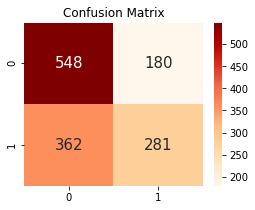

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


In [42]:
#긍부정 분석

In [43]:
lr2.coef_

array([[-0.14728582,  0.        ,  0.        , ...,  0.32483413,
         0.36534416, -0.16799904]])

# 긍부정 데이터 시각화하기

<BarContainer object of 7561 artists>

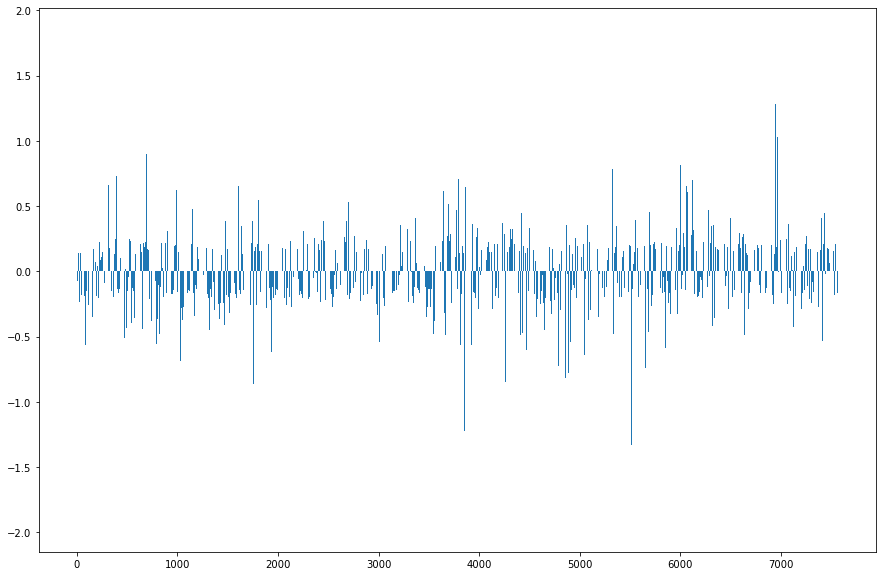

In [44]:
plt.figure(figsize=(15,10))
plt.bar(range(len(lr2.coef_[0])),lr2.coef_[0])
#양수 = 긍정 / 음수 = 부정

In [45]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])



[(1.8279976362818224, 139), (1.750501067215678, 604), (1.4530951009910418, 5103), (1.3309078492994133, 3024), (1.3018086079285849, 3352)]
[(-1.3224010360596405, 192), (-1.3322638636264397, 5513), (-1.4347397007254166, 5407), (-1.4942365497814134, 3180), (-1.9598595365638833, 6503)]


In [46]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(1.8279976362818224, 139),
 (1.750501067215678, 604),
 (1.4530951009910418, 5103),
 (1.3309078492994133, 3024),
 (1.3018086079285849, 3352),
 (1.2839537385932889, 6944),
 (1.2744279060128925, 5889),
 (1.2656819314200705, 4017),
 (1.1648616104603045, 2554),
 (1.1452071636907133, 2734),
 (1.132506245298812, 1708),
 (1.1101894854540129, 2733),
 (1.0768719417172905, 2260),
 (1.0507781104587903, 3681),
 (1.0304298016971574, 6964),
 (1.0131271599501546, 179),
 (0.9993396907850898, 2865),
 (0.9982632392032215, 2069),
 (0.9972650459923506, 3422),
 (0.9862646202278182, 4610),
 (0.9777092081517271, 6675),
 (0.9548146788410782, 3669),
 (0.9440281943346541, 981),
 (0.943783959397697, 4418),
 (0.9334908779743935, 380),
 (0.9334627648532318, 4562),
 (0.9306909780697306, 835),
 (0.9289511454694935, 3334),
 (0.9272536290389318, 490),
 (0.9164174127456906, 4576),
 (0.9048379141755912, 6698),
 (0.9013318435901865, 5887),
 (0.8964414321197202, 694),
 (0.8804543011269017, 2981),
 (0.8772574769894453, 847

In [47]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer


{1035: '낡은규제',
 7291: '혁파',
 3513: '세계',
 6333: '최고',
 3321: '상속세율',
 804: '기업인',
 3179: '사망',
 3422: '선고',
 5452: '재계',
 4213: '암세포',
 1034: '낡은',
 679: '규제',
 7123: '한국',
 362: '경제',
 7290: '혁신',
 2043: '막는다',
 2189: '머리카락',
 4265: '얇은',
 2516: '박막',
 1922: '렌즈',
 180: '개발',
 3771: '스마트폰',
 6467: '카툭',
 4374: '없앤다',
 7485: '효과',
 4501: '연말',
 1889: '랠리',
 5287: '잇는다',
 5976: '증권',
 4008: '실적',
 186: '개선',
 338: '경기',
 2453: '민감',
 5860: '주목',
 212: '갤럭시',
 6802: '티저',
 4546: '영상',
 4909: '유출',
 1941: '로운',
 1319: '다리',
 2482: '밑줄',
 643: '국정',
 1222: '농단',
 1465: '대미',
 5434: '장식',
 6778: '특검',
 5103: '이재용',
 6138: '징역',
 617: '구형',
 6544: '코스피',
 3190: '사상',
 6362: '최초',
 1133: '넘어선',
 3289: '삼전',
 5773: '조원',
 5974: '증가',
 790: '기상도',
 6538: '코로나',
 97: '갇혔던',
 3600: '소의',
 6231: '처럼',
 5503: '저돌',
 1613: '돌파',
 772: '기대',
 2553: '반도체',
 2217: '메모리',
 139: '강세',
 6020: '지속',
 6826: '파운드리',
 3699: '수요',
 1281: '늘듯',
 1759: '디스플레이',
 3433: '선명',
 7024: '프리미엄',
 3881: '시장',
 3455: '선점

# 단어별 양수 음수 확인하기

In [48]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])


강세 1.8279976362818224
구속 1.750501067215678
이재용 1.4530951009910418
붕괴 1.3309078492994133
새해 1.3018086079285849
포토 1.2839537385932889
주주총회 1.2744279060128925
실형 1.2656819314200705
반등 1.1648616104603045
법정구속 1.1452071636907133
드레서 1.132506245298812
법정 1.1101894854540129
모니터 1.0768719417172905
수사 1.0507781104587903
폴드 1.0304298016971574
개미 1.0131271599501546
본격 0.9993396907850898
만대 0.9982632392032215
선고 0.9972650459923506
오른 0.9862646202278182


In [49]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])


컨콜 -1.9598595365638833
사면 -1.4942365497814134
장관 -1.4347397007254166
적극 -1.3322638636264397
개인 -1.3224010360596405
필요 -1.3008888145506454
시리즈 -1.2197889773821475
트렌드 -1.2153535132452926
국세청 -1.1712164541034482
집중 -1.1024017559889778
증권 -1.0765985609543933
기회 -1.031618827916394
배당 -1.001426925261459
깜짝 -0.9919183678942481
임금 -0.9915451224313334
조원 -0.9820721691911862
갤럭시 -0.9773755033948648
가까이 -0.973826724300035
개발 -0.9703277866291509
규모 -0.9620803294486203
